In [16]:
#%%
#Xn+1 = (Xn + Xn-16) % 512
import random
import math
import matplotlib.pyplot as plt
start = [random.randint(1,50) for _ in range(16)]
x = 15
y = 0
kolvo = 2500
while len(start) < kolvo:
    new_ch = ((start[x] + start[y]) % 512) # 2**9
    start.append(new_ch)
    x += 1
    y += 1
z_list =[]
for i in range(len(start)):
    z = start[i] / 512
    z_list.append(z)

In [17]:
m = math.fsum(z_list) / kolvo
print("Мат. ожидание равно: {}".format(m))

Мат. ожидание равно: 0.49240546875


In [18]:
result = 0
for i in range(len(z_list)):
    result += ((z_list[i] - m) **2)
d = result / kolvo
print("Дисперсия равна: {}".format(d))

Дисперсия равна: 0.08213019998718235


In [19]:
s = 2
bb = []
for num, chislo in enumerate(list(z_list)):
    if num + s < len(z_list):
        bb.append(chislo * z_list[num + s])
result = sum(bb)
r = 1 / 12 * result / (kolvo - s)
print("Коэфициент коррелляции: {}".format(r))

Коэфициент коррелляции: 0.02045710105274975


d:\python\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


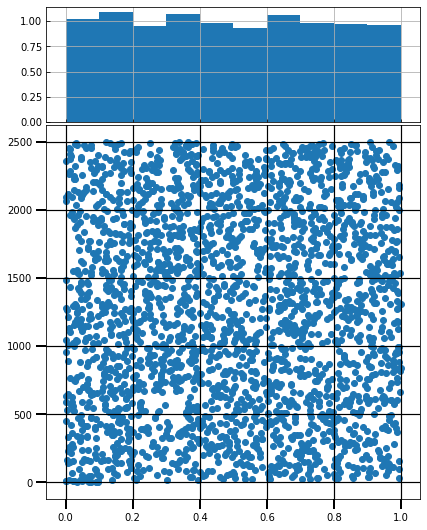

In [20]:
b = [i for i in range(kolvo)]
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
plt.figure(figsize=(8, 8))


ax_scatter = plt.axes(rect_scatter)
ax_scatter.grid(which="major", linewidth=1.2, color="black")
ax_scatter.grid(which="minor", linestyle="--", color="green", linewidth=1)
ax_scatter.tick_params(which='major', length=10, width=2)
ax_histx = plt.axes(rect_histx)
ax_histx.grid(True)
ax_histx.tick_params(direction='in', labelbottom=False)

ax_scatter.scatter(z_list, b)
bins = 10
ax_histx.hist(z_list, bins, stacked=True, normed=True)
ax_histx.set_xlim(ax_scatter.get_xlim())

plt.show()